# Project - 2 

# EDA on Vechicle Insurance Customer Data

# Challenge by Sanjay

In [237]:
#A company has customer data that contains 8 columns of customer details and another table having name customer_policy data
#contains the policy details of the customer. 

#The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team 
#to get some information. Hence, following tasks DS team decided to perform:

# 1. Add the column names to both datasets:

# i. Column Name for customer details table:

          # customer_id, 

          # Gender,

          # age, 

          # driving licence present,

          # region code, 

          # previously insured, 

          # vehicle age 

          # and vehicle damage, in respective order. 

#ii. Column Name for customer_policy table:

         #  customer_id, 

         #  annual premium (in Rs), 

         #  sales channel code, 

          # vintage and response. 

#2. Checking and Cleaning Data Quality:

#i. Null values

# Generate a summary of count of all the null values column wise
# Drop Null values for customer_id because central tendencies for id’s is not feasible.
# Replace all null values for numeric columns by mean. 
# Replace all null values for Categorical value by mode.

# ii. Outliers

# Generate a summary of count of all the outliers column wise
# Replace all outlier values for numeric columns by mean.

# (Hint1: for outlier treatment use IQR method as follows:

# For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check 
# outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

# Hint2: For getting percentile value, explore pd.describe() function)

# iii. White spaces

# Remove white spaces

# iv. case correction(lower or upper, any one) 

# v. Convert nominal data (categorical) into dummies 

# for future modeling use if required
# vi. Drop Duplicates (duplicated rows)

# 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table 
# using customer_id in both tables.

# (Hint: use pd.merge() function)

# 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

#  i. Gender wise average annual premium

# ii. Age wise average annual premium

# iii. Is your data balanced between the genders?

         # (Hint: Data is balanced if number of counts in each group is approximately same)

# iv. Vehicle age wise average annual premium.

# 5. Is there any relation between Person Age and annual premium?

# Hint: use correlation function (Correlation describes the relationship between two variables). 

# Correlation coefficient < -0.5           - Strong negative relationship

# Correlation coefficient > 0.5            -  Strong positive relationship

# 0.5 < Correlation coefficient < 0.5   - There is no relationship. 

# Click here for the files

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
df1 = pd.read_csv(r'C:\Users\P SANJAY\Downloads\Pandas1\customer.csv')
df2 = pd.read_csv(r'C:\Users\P SANJAY\Downloads\Pandas2\customer1.csv')

In [240]:
df1

,0,1,2,3,4,5,6,7
0,1.0,Male,45.0,1.0,25.0,0.0,> 2 Years,Yes
1,2.0,Male,60.0,1.0,30.0,1.0,1-2 Years,No
2,3.0,Male,55.0,1.0,20.0,1.0,> 2 Years,No
3,4.0,Female,25.0,1.0,15.0,0.0,< 1 Year,No
4,5.0,Male,4.0,1.0,7.0,0.0,< 1 Year,Yes


In [241]:
df2

,0,1,2,3,4
0,1.0,45564.0,65.0,350.0,1.0
1,2.0,40556.0,55.0,155.0,0.0
2,3.0,35679.0,25.0,249.0,1.0
3,4.0,25619.0,125.0,35.0,0.0
4,5.0,21597.0,126.0,69.0,0.0


In [242]:
# 1.(i).
# Adding column names for customer_details

headers =['Customer_id','Gender','age','driving licence present','region code','previously insured','vechicle age','vechicle damage']
df1.columns = headers
df1.head()

,Customer_id,Gender,age,driving licence present,region code,previously insured,vechicle age,vechicle damage
0,1.0,Male,45.0,1.0,25.0,0.0,> 2 Years,Yes
1,2.0,Male,60.0,1.0,30.0,1.0,1-2 Years,No
2,3.0,Male,55.0,1.0,20.0,1.0,> 2 Years,No
3,4.0,Female,25.0,1.0,15.0,0.0,< 1 Year,No
4,5.0,Male,4.0,1.0,7.0,0.0,< 1 Year,Yes


In [243]:
# 1.(ii).
# Adding Column names for customer_policy details

headers = ['Customer_id','annual premium(in Rs)','sales channel code','vintage','response']
df2.columns = headers
df2.head()

,Customer_id,annual premium(in Rs),sales channel code,vintage,response
0,1.0,45564.0,65.0,350.0,1.0
1,2.0,40556.0,55.0,155.0,0.0
2,3.0,35679.0,25.0,249.0,1.0
3,4.0,25619.0,125.0,35.0,0.0
4,5.0,21597.0,126.0,69.0,0.0


In [250]:
# 2. Checking and cleaning Data Quality
# 2(i).NULL Values
# 2.i.(a).Generate a summary of count of all null values column wise
# Column wise count of all null valuues on customer details table

df1_null = df1.isnull()
for i in df1_null.columns.values.tolist():
    print(i)
    print(df1_null[i].value_counts())
    print("")
    

Customer_id
False    5
Name: Customer_id, dtype: int64

Gender
False    5
Name: Gender, dtype: int64

age
False    5
Name: age, dtype: int64

driving licence present
False    5
Name: driving licence present, dtype: int64

region code
False    5
Name: region code, dtype: int64

previously insured
False    5
Name: previously insured, dtype: int64

vechicle age
False    5
Name: vechicle age, dtype: int64

vechicle damage
False    5
Name: vechicle damage, dtype: int64



In [251]:
# Column wise count of all null valuues on customer policy details  table

df1_null = df1.isnull()
for i in df1_null.columns.values.tolist():
    print(i)
    print(df1_null[i].value_counts())
    print("")

Customer_id
False    5
Name: Customer_id, dtype: int64

Gender
False    5
Name: Gender, dtype: int64

age
False    5
Name: age, dtype: int64

driving licence present
False    5
Name: driving licence present, dtype: int64

region code
False    5
Name: region code, dtype: int64

previously insured
False    5
Name: previously insured, dtype: int64

vechicle age
False    5
Name: vechicle age, dtype: int64

vechicle damage
False    5
Name: vechicle damage, dtype: int64



In [252]:
# 2.i.(b).Drop NULL values for customer_id 

# Here dropping the rows that contains null values of customer_id of customer details table

df1.dropna(subset=['Customer_id'],axis = 0,inplace = True)
df1.reset_index(drop  = True,inplace = True)

In [253]:
# Here dropping the rows that contains null values of customer_id of customer policy details table

df2.dropna(subset=['Customer_id'],axis = 0,inplace = True)
df2.reset_index(drop  = True,inplace = True)

In [254]:
# 2.i.(c).Replacing all null values for numeric columns by mean

df1.head()

,Customer_id,Gender,age,driving licence present,region code,previously insured,vechicle age,vechicle damage
0,1.0,Male,45.0,1.0,25.0,0.0,> 2 Years,Yes
1,2.0,Male,60.0,1.0,30.0,1.0,1-2 Years,No
2,3.0,Male,55.0,1.0,20.0,1.0,> 2 Years,No
3,4.0,Female,25.0,1.0,15.0,0.0,< 1 Year,No
4,5.0,Male,4.0,1.0,7.0,0.0,< 1 Year,Yes


In [256]:
# Replacing the NaN values of age by its mean value

df1['age'].fillna(df1['age'].mean(),inplace = True)

# Replacing the NaN values of region code by its mean value

df1['region code'].fillna(df1['region code'].mean(),inplace = True)


In [257]:
df2.head()

,Customer_id,annual premium(in Rs),sales channel code,vintage,response
0,1.0,45564.0,65.0,350.0,1.0
1,2.0,40556.0,55.0,155.0,0.0
2,3.0,35679.0,25.0,249.0,1.0
3,4.0,25619.0,125.0,35.0,0.0
4,5.0,21597.0,126.0,69.0,0.0


In [258]:
# Replacing the NaN values of annual premium by its mean value

df2['annual premium(in Rs)'].fillna(df2['annual premium(in Rs)'].mean(),inplace = True)

# Replacing the NaN values of sales channel code by its mean value

df2['sales channel code'].fillna(df2['sales channel code'].mean(),inplace = True)

# Replacing the NaN values of vintage by its mean value

df2['vintage'].fillna(df2['vintage'].mean(),inplace = True)

In [259]:
# 2.i.(d)Replacing categorical null values by its mode.

# It replaces the null values with the value which exist maximum number of times i.e mode

df1['driving licence present'].fillna(df1['driving licence present'].mode()[0],inplace = True)

df1['previously insured'].fillna(df1['previously insured'].mode()[0],inplace = True)

df2['response'].fillna(df2['response'].mode()[0],inplace = True)


In [260]:
# 2(ii) OUTLIERS
# 2.II.(a).Generate a summary of count of all the outliers coulumn wise

# In customer details table we need to calcualte outliers for columns age and regional code.others are non-numerical columns
# so in that case we can ignore it

def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

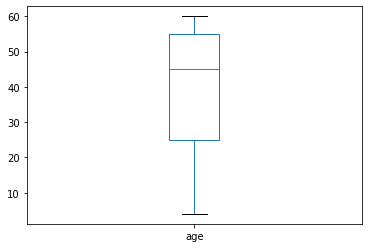

In [261]:
plot_boxplot(df1,'age')

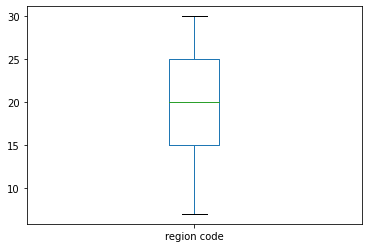

In [262]:
plot_boxplot(df1,'region code')

In [263]:
#These fuctions may find the outliers Now it may present by IQR method....

def finding_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outlier = df[((df<(q1-1.5*iqr))| (df>(q3+1.5*iqr)))]
    return outlier

outliers = finding_outliers(df1['age'])
print('Number of outliers:',len(outliers))
print('Maximum outlier value:',outliers.max())
print('Minimum outlier value:',outliers.min())

Number of outliers: 0
Maximum outlier value: nan
Minimum outlier value: nan


In [264]:
outliers = finding_outliers(df1['region code'])
print('Number of outliers:',len(outliers))
print('Maximum outlier value:',outliers.max())
print('Minimum outlier value:',outliers.min())

Number of outliers: 0
Maximum outlier value: nan
Minimum outlier value: nan


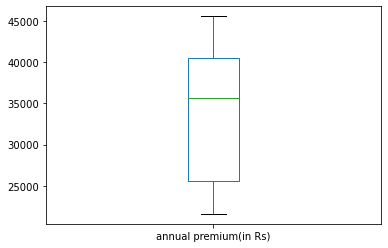

In [265]:
# Finding outliers for customer policy details

plot_boxplot(df2,'annual premium(in Rs)')

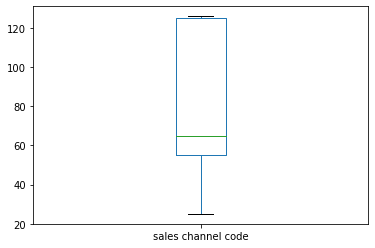

In [266]:
plot_boxplot(df2,'sales channel code')

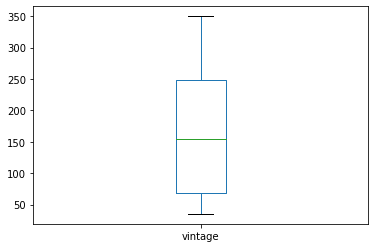

In [267]:
plot_boxplot(df2,'vintage')

In [268]:
outliers = finding_outliers(df2['annual premium(in Rs)'])
print('Number of outliers:',len(outliers))
print('Maximum outlier value:',outliers.max())
print('Minimum outlier value:',outliers.min())

Number of outliers: 0
Maximum outlier value: nan
Minimum outlier value: nan


In [269]:
outliers = finding_outliers(df2['sales channel code'])
print('Number of outliers:',len(outliers))
print('Maximum outlier value:',outliers.max())
print('Minimum outlier value:',outliers.min())

Number of outliers: 0
Maximum outlier value: nan
Minimum outlier value: nan


In [270]:
outliers = finding_outliers(df2['vintage'])
print('Number of outliers:',len(outliers))
print('Maximum outlier value:',outliers.max())
print('Minimum outlier value:',outliers.min())

Number of outliers: 0
Maximum outlier value: nan
Minimum outlier value: nan


In [271]:
# 2.ii.(b). Replacing  the outliers with mean values

def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df<(q1-1.5*iqr))].min()
    df = np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df

df2['annual premium(in Rs)']= replace_outlier(df2['annual premium(in Rs)'])

In [272]:
# 2.(iii).Remove white spaces

df1.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

,Customer_id,Gender,age,driving licence present,region code,previously insured,vechicle age,vechicle damage
0,1.0,Male,45.0,1.0,25.0,0.0,> 2 Years,Yes
1,2.0,Male,60.0,1.0,30.0,1.0,1-2 Years,No
2,3.0,Male,55.0,1.0,20.0,1.0,> 2 Years,No
3,4.0,Female,25.0,1.0,15.0,0.0,< 1 Year,No
4,5.0,Male,4.0,1.0,7.0,0.0,< 1 Year,Yes


In [273]:
# Here the customer policy details table contains all the columns of float type .so no need to remove spaces

In [274]:
# 2.(iv).Case Correction (lower or Upper anyone)

df1.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

,Customer_id,Gender,age,driving licence present,region code,previously insured,vechicle age,vechicle damage
0,1.0,male,45.0,1.0,25.0,0.0,> 2 years,yes
1,2.0,male,60.0,1.0,30.0,1.0,1-2 years,no
2,3.0,male,55.0,1.0,20.0,1.0,> 2 years,no
3,4.0,female,25.0,1.0,15.0,0.0,< 1 year,no
4,5.0,male,4.0,1.0,7.0,0.0,< 1 year,yes


In [275]:
# 2.(v). Convert nominal data (categorical) into dummy variables

# Here Creating dummy variables for Vechicle damage(Because the vechicle damage has two uniques values like "Yes or No")

dummy_variables_1 = pd.get_dummies(df1["vechicle damage"])
dummy_variables_1.head()

,No,Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [276]:
# Here i will reanme the coluumn names for better view of vechicle-damage

dummy_variables_1.rename(columns={'No':'vechicle-damage-No','Yes':'vechicle-damage-No'},inplace = True)
dummy_variables_1.head()

,vechicle-damage-No,vechicle-damage-No
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [277]:
df1 = pd.concat([df1,dummy_variables_1],axis = 1)

In [278]:
# 2.(iv). Drop Duplicates(duplicated rows)

# Dropping duplicates from customer details table

df1.drop_duplicates(inplace = True)

In [279]:
# Dropping duplicates from customer policy details table


df2.drop_duplicates(inplace = True)

In [280]:
#3.Merging the data sets:

master_data = pd.merge(df1,df2,on = 'Customer_id')
master_data

,Customer_id,Gender,age,driving licence present,region code,previously insured,vechicle age,vechicle damage,vechicle-damage-No,vechicle-damage-No,annual premium(in Rs),sales channel code,vintage,response
0,1.0,Male,45.0,1.0,25.0,0.0,> 2 Years,Yes,0,1,45564.0,65.0,350.0,1.0
1,2.0,Male,60.0,1.0,30.0,1.0,1-2 Years,No,1,0,40556.0,55.0,155.0,0.0
2,3.0,Male,55.0,1.0,20.0,1.0,> 2 Years,No,1,0,35679.0,25.0,249.0,1.0
3,4.0,Female,25.0,1.0,15.0,0.0,< 1 Year,No,1,0,25619.0,125.0,35.0,0.0
4,5.0,Male,4.0,1.0,7.0,0.0,< 1 Year,Yes,0,1,21597.0,126.0,69.0,0.0


In [281]:
# 4. Company nees some important information from the master table to make decisions for future growth.

# 4.(i). Gender wise average annual premium

Gender_data = master_data.groupby('Gender')['annual premium(in Rs)'].mean()
Gender_data

Gender
Female    25619.0
Male      35849.0
Name: annual premium(in Rs), dtype: float64

<AxesSubplot:xlabel='Gender'>

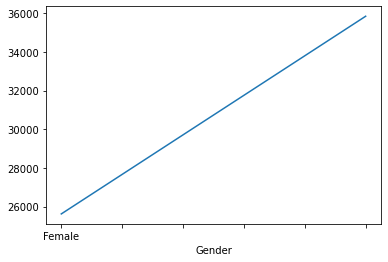

In [282]:
# Plotting a linear and bar graphs for better known

Gender_data.plot()

<AxesSubplot:title={'center':'Gender vs average annual premium(in Rs)'}, xlabel='Gender'>

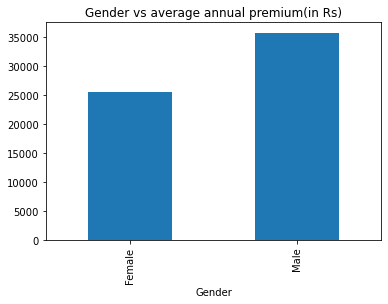

In [283]:
# Bar Graph

Gender_data.plot.bar(title ='Gender vs average annual premium(in Rs)')

In [284]:
# 4.(ii). Age wise annual premium

age_data = master_data.groupby('age')['annual premium(in Rs)'].mean()
age_data

age
4.0     21597.0
25.0    25619.0
45.0    45564.0
55.0    35679.0
60.0    40556.0
Name: annual premium(in Rs), dtype: float64

<AxesSubplot:title={'center':'age vs average annual premium'}, xlabel='age', ylabel='annual premium(in Rs)'>

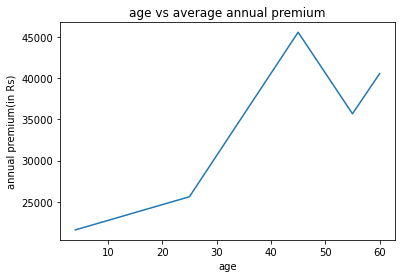

In [285]:
# Here it may shows the linear graph

age_data.plot(xlabel='age',ylabel ='annual premium(in Rs)',title ='age vs average annual premium')

<AxesSubplot:xlabel='age'>

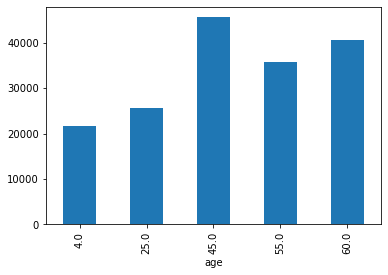

In [286]:
age_data.plot.bar()

In [287]:
# 4.(iii). Checking the data balanced B/W the Genders or not.

master_data.groupby('Gender').count()


,Customer_id,age,driving licence present,region code,previously insured,vechicle age,vechicle damage,vechicle-damage-No,vechicle-damage-No,annual premium(in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,,,
Female,1,1,1,1,1,1,1,1,1,1,1,1,1
Male,4,4,4,4,4,4,4,4,4,4,4,4,4


In [288]:
# Summary:
# Here the ration between male and female is most approximately 1.
# Her the data between Gender is approximately same... so the data is balanced

In [289]:
# 4.(iv). Vechicle age wise average annual premium

vechicle_age_data = master_data.groupby('vechicle age')['annual premium(in Rs)'].mean()
vechicle_age_data

vechicle age
1-2 Years    40556.0
< 1 Year     23608.0
> 2 Years    40621.5
Name: annual premium(in Rs), dtype: float64

<AxesSubplot:xlabel='vechicle age'>

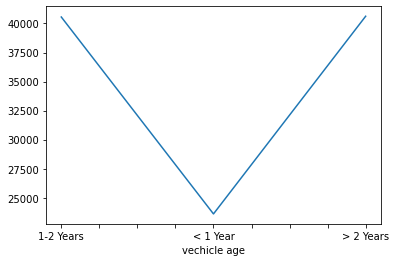

In [290]:
# Here representing the liner and bar graoh for vechicle age
# linear graph

vechicle_age_data.plot()

<AxesSubplot:xlabel='vechicle age'>

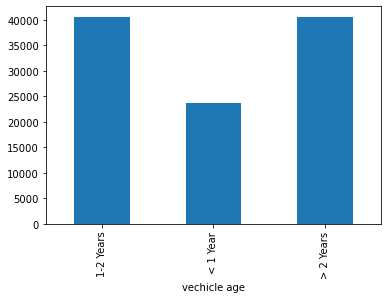

In [291]:
# Bar Graph

vechicle_age_data.plot.bar()

In [292]:
# 5.The Correlation between Person age and annual premium

master_data['age'].corr(master_data['annual premium(in Rs)'])

0.8426522363532135

In [293]:
# Matrix form of correlation

master_data[['age','annual premium(in Rs)']].corr()

,age,annual premium(in Rs)
age,1.000000,0.842652
annual premium(in Rs),0.842652,1.000000


In [231]:
# Summary:
# Here the person coefficient lies between 0.5 ans -5,so the relation betweeen age and annual premium